In [1]:
import pandas as pd
import numpy as np
from IPython.display import Markdown as md
np.__version__

'1.19.5'

## Load the list of Hot 100 hits for every week through 2020

This data source is centered around *top 100 songs each week*, without much of any other metadata beyond the week.

We want a dataset focused on *a non-duplicative list of songs that reached above X spot* on any given week.

Then merge it with other metadata, including lyrics.

[data source](https://data.world/kcmillersean/billboard-hot-100-1958-2017/workspace/data-dictionary)

### To do ... this right :P Basically we need to re-do steps 1-2 with better data, & in reverse order (fetch lyrics AFTER I determine what all the songs we need lyrics for)
- [ ] Hot 100: Basically, Sean Miller made this data.world dataset linked above. But since then he's taken to keeping [a super up-do-date list on GitHub](https://github.com/HipsterVizNinja/random-data/tree/main/Music/hot-100) through much of 2022 last I checked. **We need to re-run this all using this dataset.**
- [ ] Pull my own metadata from [Spotify](https://developer.spotify.com/documentation/web-api/), likely using [Spotipy](https://spotipy.readthedocs.io/en/2.19.0/).
- [ ] .... THEN pull all the lyrics via Lyric Genius (because the current lyric dataset is kinda trash)

In [2]:
hot_100_df = pd.read_csv('./data/Hot Stuff.csv')

In [3]:
hot_100_df.head()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8


In [4]:
f"Unique songs: {len(hot_100_df.drop_duplicates(subset=['SongID']))}"

'Unique songs: 29389'

## Load dataset of any spotify metadata that exists for the Hot 100 songs

Same [data source](https://data.world/kcmillersean/billboard-hot-100-1958-2017/workspace/data-dictionary)

### To do:
- [ ] Since this dataset was pulled based off the original Hot 100 dataset, adding more recent years means we need to pull more Spotify data for them. (it's also technically possible that spotify has now added metadata for old songs that weren't there when the dataset was made)

In [5]:
hot_100_audio_features = pd.read_csv('./data/Hot 100 Audio Features.csv')

In [6]:
hot_100_audio_features.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,0.154,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,0.588,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),0.759,...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


In [7]:
f"Unique songs: {len(hot_100_audio_features.drop_duplicates(subset=['SongID']))}"

'Unique songs: 29386'

In [8]:
SONG_RANKING_FILTER_THRESHOLD = 10

In [9]:
md(f"# Filter to songs that breached the top {SONG_RANKING_FILTER_THRESHOLD}")

# Filter to songs that breached the top 10

In [10]:
temp = hot_100_df.sort_values('Peak Position').groupby(['SongID']).first()
only_songs_that_made_it_above_x = temp[
    temp['Peak Position'] <= SONG_RANKING_FILTER_THRESHOLD
].reset_index()

only_songs_that_made_it_above_x

,SongID,url,WeekID,Week Position,Song,Performer,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,#9 DreamJohn Lennon,http://www.billboard.com/charts/hot-100/1975-0...,2/22/1975,9,#9 Dream,John Lennon,1,10.0,9,10
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,http://www.billboard.com/charts/hot-100/2002-1...,12/28/2002,4,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,1,5.0,4,10
2,'65 Love AffairPaul Davis,http://www.billboard.com/charts/hot-100/1982-0...,6/12/1982,18,'65 Love Affair,Paul Davis,1,9.0,6,16
3,('til) I Kissed YouThe Everly Brothers,http://www.billboard.com/charts/hot-100/1959-1...,10/24/1959,11,('til) I Kissed You,The Everly Brothers,1,5.0,4,11
4,(Can't Live Without Your) Love And AffectionNe...,http://www.billboard.com/charts/hot-100/1990-1...,12/22/1990,94,(Can't Live Without Your) Love And Affection,Nelson,1,87.0,1,25
...,...,...,...,...,...,...,...,...,...,...
4978,everything i wantedBillie Eilish,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,25,everything i wanted,Billie Eilish,1,26.0,8,4
4979,iSpyKYLE Featuring Lil Yachty,http://www.billboard.com/charts/hot-100/2017-0...,5/6/2017,6,iSpy,KYLE Featuring Lil Yachty,1,6.0,4,17
4980,interludeJ. Cole,https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,17,interlude,J. Cole,1,8.0,8,2
4981,"my.lifeJ. Cole, 21 Savage & Morray",https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,2,my.life,"J. Cole, 21 Savage & Morray",1,NaN,2,1


In [11]:
# merge on songId with audio features
merged_df_raw = (
    only_songs_that_made_it_above_x.merge(left_on='SongID', right=hot_100_audio_features, right_on='SongID', how='left')
).drop_duplicates(subset=['SongID'])

merged_df_raw

,SongID,url,WeekID,Week Position,Song_x,Performer_x,Instance,Previous Week Position,Peak Position,Weeks on Chart,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,#9 DreamJohn Lennon,http://www.billboard.com/charts/hot-100/1975-0...,2/22/1975,9,#9 Dream,John Lennon,1,10.0,9,10,...,-11.745,1.0,0.0336,0.0744,0.013300,0.2540,0.478,115.474,4.0,55.0
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,http://www.billboard.com/charts/hot-100/2002-1...,12/28/2002,4,'03 Bonnie & Clyde,Jay-Z Featuring Beyonce Knowles,1,5.0,4,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
2,'65 Love AffairPaul Davis,http://www.billboard.com/charts/hot-100/1982-0...,6/12/1982,18,'65 Love Affair,Paul Davis,1,9.0,6,16,...,-4.247,0.0,0.0274,0.4320,0.000006,0.1330,0.952,155.697,4.0,40.0
3,('til) I Kissed YouThe Everly Brothers,http://www.billboard.com/charts/hot-100/1959-1...,10/24/1959,11,('til) I Kissed You,The Everly Brothers,1,5.0,4,11,...,-11.689,0.0,0.0459,0.4010,0.000000,0.2990,0.701,139.567,4.0,53.0
4,(Can't Live Without Your) Love And AffectionNe...,http://www.billboard.com/charts/hot-100/1990-1...,12/22/1990,94,(Can't Live Without Your) Love And Affection,Nelson,1,87.0,1,25,...,-6.344,1.0,0.0393,0.0354,0.000000,0.0609,0.855,121.419,4.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,everything i wantedBillie Eilish,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,25,everything i wanted,Billie Eilish,1,26.0,8,4,...,-14.454,0.0,0.0994,0.9020,0.657000,0.1060,0.243,120.006,4.0,97.0
5016,iSpyKYLE Featuring Lil Yachty,http://www.billboard.com/charts/hot-100/2017-0...,5/6/2017,6,iSpy,KYLE Featuring Lil Yachty,1,6.0,4,17,...,-6.745,1.0,0.2890,0.3780,0.000000,0.2290,0.672,75.016,4.0,78.0
5017,interludeJ. Cole,https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,17,interlude,J. Cole,1,8.0,8,2,...,-8.336,1.0,0.4610,0.6260,0.000000,0.1190,0.138,84.066,4.0,57.0
5018,"my.lifeJ. Cole, 21 Savage & Morray",https://www.billboard.com/charts/hot-100/2021-...,5/29/2021,2,my.life,"J. Cole, 21 Savage & Morray",1,NaN,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
USEFUL_COLUMNS = [
    'SongID', 'Performer_x', 'Song_x', 'spotify_genre',
       'spotify_track_preview_url',
       'spotify_track_explicit', 'spotify_track_album', 'WeekID', 'Peak Position'
]
merged_df = merged_df_raw[USEFUL_COLUMNS].rename(columns={'Performer_x': 'Performer', 'Song_x': 'Song'})
merged_df

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Peak Position
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",NaN,True,The Blueprint 2 The Gift & The Curse,12/28/2002,4
2,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",https://p.scdn.co/mp3-preview/a701445830ecacfb...,False,Radio Hits Of the '80s,6/12/1982,6
3,('til) I Kissed YouThe Everly Brothers,The Everly Brothers,('til) I Kissed You,"['adult standards', 'brill building pop', 'bub...",https://p.scdn.co/mp3-preview/c1719c80d7145e73...,False,The Very Best of The Everly Brothers,10/24/1959,4
4,(Can't Live Without Your) Love And AffectionNe...,Nelson,(Can't Live Without Your) Love And Affection,"['classic country pop', 'country', 'nashville ...",NaN,False,After The Rain (Remastered),12/22/1990,1
...,...,...,...,...,...,...,...,...,...
5015,everything i wantedBillie Eilish,Billie Eilish,everything i wanted,"['electropop', 'pop']",NaN,False,everything i wanted,12/14/2019,8
5016,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4
5017,interludeJ. Cole,J. Cole,interlude,"['conscious hip hop', 'north carolina hip hop'...",NaN,True,"{'album_type': 'album', 'artists': [{'external...",5/29/2021,8
5018,"my.lifeJ. Cole, 21 Savage & Morray","J. Cole, 21 Savage & Morray",my.life,NaN,NaN,NaN,NaN,5/29/2021,2


# Attach lyrics

## Merge dataset of lyrics already pulled
Start by just merging the lyrics scraped **through 2019** [by this person](https://towardsdatascience.com/sentiment-analysis-of-all-billboard-hot-100-songs-over-time-1958-2019-3329439e7c1a)

[Here's the actual dataset on data.world](https://data.world/szubair/lyric-sentiment-ananlysis/workspace/file?filename=lyric-full_df.csv)

A commenter warns: "The scraped dataset has a lot of errors, since the lyrics copied when the correct song isn't found are often nothing (1968 songs) or random other things, such as book transcripts or screenplays. There are ~2500 songs with over 9000 characters and ~800 with over 100,000, almost all of which are not songs. There may be more errors when incorrect songs are scraped that escaped the simple character count check."

### TODO
- [ ] This dataset honestly looks a little sketchy (ie random non-songs exist in it). I should probably just pull all the lyrics myself via Spotify API

In [13]:
pre_scraped_lyrics_through_2019_raw = pd.read_csv('./data/lyric-full_df.csv')[['SongID', 'Lyrics']]

In [14]:
pre_scraped_lyrics_through_2019 = pre_scraped_lyrics_through_2019_raw[
    # Blatently
    pre_scraped_lyrics_through_2019_raw['Lyrics'].apply(lambda x: len(x) < 15000)
]

In [15]:
merged_with_thru_2019_lyrics = merged_df.merge(left_on='SongID', right=pre_scraped_lyrics_through_2019, right_on='SongID', how='left')
merged_with_thru_2019_lyrics

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Peak Position,Lyrics
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"[Verse 1]\nSo long ago\nWas it in a dream, was..."
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",NaN,True,The Blueprint 2 The Gift & The Curse,12/28/2002,4,"[Intro: Jay Z]\nUhh, uhh, uhh\nYou ready, B?\n..."
2,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",https://p.scdn.co/mp3-preview/a701445830ecacfb...,False,Radio Hits Of the '80s,6/12/1982,6,'65 love affair\nPaul Davis\n\nI was a car hop...
3,('til) I Kissed YouThe Everly Brothers,The Everly Brothers,('til) I Kissed You,"['adult standards', 'brill building pop', 'bub...",https://p.scdn.co/mp3-preview/c1719c80d7145e73...,False,The Very Best of The Everly Brothers,10/24/1959,4,Never felt like this until I kissed ya\nHow di...
4,(Can't Live Without Your) Love And AffectionNe...,Nelson,(Can't Live Without Your) Love And Affection,"['classic country pop', 'country', 'nashville ...",NaN,False,After The Rain (Remastered),12/22/1990,1,"(Here she comes) Mmm, just like an angel\nSeem..."
...,...,...,...,...,...,...,...,...,...,...
4978,everything i wantedBillie Eilish,Billie Eilish,everything i wanted,"['electropop', 'pop']",NaN,False,everything i wanted,12/14/2019,8,NaN
4979,iSpyKYLE Featuring Lil Yachty,KYLE Featuring Lil Yachty,iSpy,"['pop rap', 'rap']",https://p.scdn.co/mp3-preview/c4f8b370f963c3fd...,True,iSpy (feat. Lil Yachty),5/6/2017,4,"Ãeviri: Can YazganarÄ±kan,Arda Epli\n(DCCTCev..."
4980,interludeJ. Cole,J. Cole,interlude,"['conscious hip hop', 'north carolina hip hop'...",NaN,True,"{'album_type': 'album', 'artists': [{'external...",5/29/2021,8,NaN
4981,"my.lifeJ. Cole, 21 Savage & Morray","J. Cole, 21 Savage & Morray",my.life,NaN,NaN,NaN,NaN,5/29/2021,2,NaN


### TODO: pull in data I had pull from Lyrics Genius Myself

In [16]:
fully_updated_df = merged_with_thru_2019_lyrics

## Clean up the now fully merged data

In [17]:
ready_for_export = fully_updated_df.dropna(subset=['Lyrics','WeekID'])
ready_for_export

,SongID,Performer,Song,spotify_genre,spotify_track_preview_url,spotify_track_explicit,spotify_track_album,WeekID,Peak Position,Lyrics
0,#9 DreamJohn Lennon,John Lennon,#9 Dream,"['album rock', 'classic rock', 'folk rock', 'm...",NaN,False,Walls And Bridges,2/22/1975,9,"[Verse 1]\nSo long ago\nWas it in a dream, was..."
1,'03 Bonnie & ClydeJay-Z Featuring Beyonce Knowles,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,"['east coast hip hop', 'hip hop', 'pop rap', '...",NaN,True,The Blueprint 2 The Gift & The Curse,12/28/2002,4,"[Intro: Jay Z]\nUhh, uhh, uhh\nYou ready, B?\n..."
2,'65 Love AffairPaul Davis,Paul Davis,'65 Love Affair,"['album rock', 'bubblegum pop', 'country rock'...",https://p.scdn.co/mp3-preview/a701445830ecacfb...,False,Radio Hits Of the '80s,6/12/1982,6,'65 love affair\nPaul Davis\n\nI was a car hop...
3,('til) I Kissed YouThe Everly Brothers,The Everly Brothers,('til) I Kissed You,"['adult standards', 'brill building pop', 'bub...",https://p.scdn.co/mp3-preview/c1719c80d7145e73...,False,The Very Best of The Everly Brothers,10/24/1959,4,Never felt like this until I kissed ya\nHow di...
4,(Can't Live Without Your) Love And AffectionNe...,Nelson,(Can't Live Without Your) Love And Affection,"['classic country pop', 'country', 'nashville ...",NaN,False,After The Rain (Remastered),12/22/1990,1,"(Here she comes) Mmm, just like an angel\nSeem..."
...,...,...,...,...,...,...,...,...,...,...
4972,Your Wildest DreamsThe Moody Blues,The Moody Blues,Your Wildest Dreams,"['album rock', 'art rock', 'british invasion',...",NaN,False,The Other Side Of Life,8/23/1986,9,Once upon a time\nOnce when you were mine\nI r...
4973,Yummy Yummy YummyOhio Express,Ohio Express,Yummy Yummy Yummy,['bubblegum pop'],https://p.scdn.co/mp3-preview/1a9acffce8eb1a96...,False,The Best of the Ohio Express,7/13/1968,4,"[Intro]\n\nYummy, Yummy, Yummy\nI got love in ..."
4975,ZEZEKodak Black Featuring Travis Scott & Offset,Kodak Black Featuring Travis Scott & Offset,ZEZE,"['florida rap', 'hip hop', 'melodic rap', 'mia...",https://p.scdn.co/mp3-preview/6ccc75509be729ff...,True,Dying to Live,10/27/2018,2,[Intro]\nD.A. got that dope!\n\n[Chorus: Travi...
4976,Zip-A-Dee Doo-DahBob B. Soxx And The Blue Jeans,Bob B. Soxx And The Blue Jeans,Zip-A-Dee Doo-Dah,['brill building pop'],NaN,NaN,NaN,2/9/1963,8,"Zip a dee doo dah, zip a dee ay\nMy, my, my, m..."


### Distribution of songs by year

<AxesSubplot:>

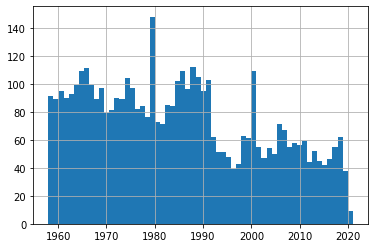

In [18]:
ready_for_export.WeekID.apply(lambda d: int(d[-4:])).hist(bins=60)

In [19]:
ready_for_export.to_csv('./data/2 OUTPUT Songs with metadata and lyrics.csv', index=False)